<a href="https://colab.research.google.com/github/betzabeth446/TP-PARTE-2/blob/main/TP_INTEGRADOR_2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Cargar los datos de clientes
customers_df = pd.read_csv('ecommerce_customers_dataset.csv')
customers_df.set_index('customer_id', inplace=True)

# Cargar los datos de órdenes
orders_df = pd.read_csv('ecommerce_orders_dataset.csv')
orders_df.set_index('order_id', inplace=True)

# Cargar los datos de ítems de órdenes
order_items_df = pd.read_csv('ecommerce_order_items_dataset.csv')
order_items_df.set_index('order_id', inplace=True)

# Cargar los datos de productos
products_df = pd.read_csv('ecommerce_products_dataset.csv')
products_df.set_index('product_id', inplace=True)

# Cargar los datos de pagos
payments_df = pd.read_csv('ecommerce_order_payments_dataset.csv')
payments_df.set_index('order_id', inplace=True)


# Base Customers

In [4]:
# Base customers
customers_df = pd.read_csv('ecommerce_customers_dataset.csv')
customers_df.set_index('customer_id', inplace=True)

In [5]:
customers_df.head()

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
customer_id,,,,
06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
total_orders1 = customers_df.index.nunique()
print(f"Número total de pedidos realizados: {total_orders1}")

Número total de pedidos realizados: 99441


In [7]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_unique_id        99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.8+ MB


In [8]:
# Total de clientes únicos.
número_clientes01 = customers_df["customer_unique_id"].value_counts()
número_clientes01
## Registros únicos = 96096

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: count, Length: 96096, dtype: int64

# Base Orders

In [9]:
# base orders
orders_df = pd.read_csv('ecommerce_orders_dataset.csv')

In [12]:
# base orders
orders_df = pd.read_csv('ecommerce_orders_dataset.csv')

# Check for possible typos in the column name
print(orders_df.columns)

# Assuming the column name is 'order_id'
# If not, replace with the correct name from the output above
orders_df.set_index('order_id', inplace=True)

orders_df.head()

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_id,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
número_clientes02 = orders_df["customer_id"].value_counts()
número_clientes02

customer_id
9ef432eb6251297304e76186b10a928d    1
413f7e58270a32396af030a075b924be    1
eb4350b67a0264c67e5e06a038e4afbb    1
622b07d262d545d16efbd4363a89cb91    1
c701fbfa77791abd05eef9eacf7ea7a8    1
                                   ..
39585f08d13377e50fde35467984e6eb    1
eb3d995301c320683de629f5b4dd0c78    1
f2507ea56d748a23037bb1214964e87d    1
ae8269d850cd3a3d06a56877c450b3f8    1
edb027a75a1449115f6b43211ae02a24    1
Name: count, Length: 99441, dtype: int64

In [14]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, e481f51cbdc54678b7cc49136f2d6af7 to 66dea50a8b16d9b4dee7af250b4be1a5
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99441 non-null  object
 1   order_status                   99441 non-null  object
 2   order_purchase_timestamp       99441 non-null  object
 3   order_approved_at              99281 non-null  object
 4   order_delivered_carrier_date   97658 non-null  object
 5   order_delivered_customer_date  96476 non-null  object
 6   order_estimated_delivery_date  99441 non-null  object
dtypes: object(7)
memory usage: 6.1+ MB


In [15]:
orders_df.groupby("order_status").size()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
dtype: int64

In [16]:
order_items_df = pd.read_csv('ecommerce_order_items_dataset.csv')

In [17]:
order_items_df.set_index('order_id', inplace=True) # Use order_items_df instead of order_items
order_items_df.head()

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [18]:
order_items_df["price"].mean()

120.65373901464716

In [19]:
order_items_df["freight_value"].mean()

19.990319928983578

In [20]:
(order_items_df["price"]+order_items_df["freight_value"]).mean()

140.6440589436307

# Base Products

In [21]:
products_df = pd.read_csv('ecommerce_products_dataset.csv')

In [22]:
products_df.set_index('product_id', inplace=True) # Use products_df instead of products
products_df.head()

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_id,,,,,,,,
1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [23]:
## Categoria de producto más vendido.
categoria_prod = products_df["product_category_name"].value_counts(ascending=False)
categoria_prod

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [24]:
categoria_prod.to_excel("categorias_producto_frecuencia.xlsx")

### Base payments

In [25]:
payments_df = pd.read_csv('ecommerce_order_payments_dataset.csv')

In [26]:
payments_df.set_index('order_id', inplace=True)
payments_df.head()

,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [27]:
# variable asociada al pago sea payment_value
round(payments_df["payment_value"].mean(),3)

154.1

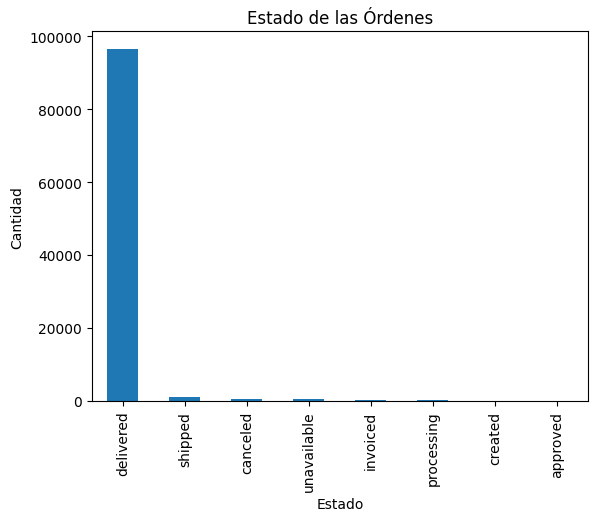

In [28]:
import matplotlib.pyplot as plt

# Gráfico de barras para el estado de órdenes
orders_status_counts = orders_df["order_status"].value_counts()
orders_status_counts.plot(kind='bar')
plt.title('Estado de las Órdenes')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()
